In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced

In [12]:
# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

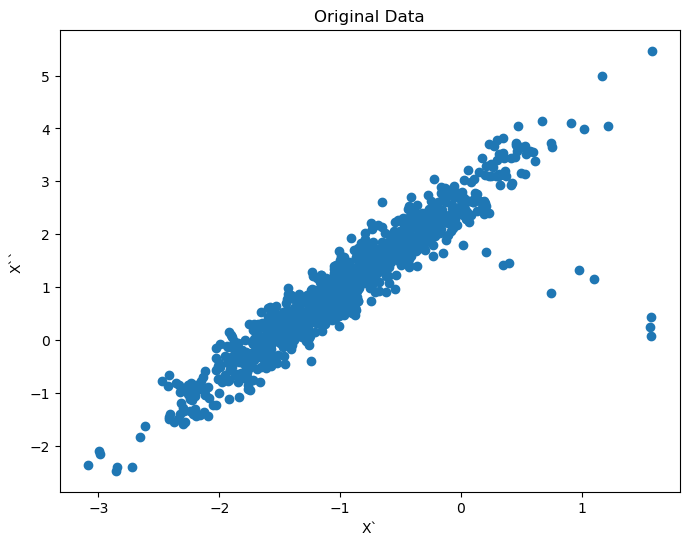

Counter({0: 990, 1: 10})


In [13]:
# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1],)
plt.title("Original Data")
plt.xlabel("X`")
plt.ylabel("X``")
plt.show()

print(Counter(y))

In [14]:
# Make the dataset more imbalanced
X_imbalanced, y_imbalanced = make_imbalance(X, y, sampling_strategy={0: 990, 1: 10}, random_state=42)

In [15]:
# Create the BIRCH model
birch = Birch(threshold=0.5, n_clusters=2)

# Fit the model to the data
birch.fit(X_imbalanced)

# Predict the cluster labels
clusters = birch.predict(X_imbalanced)

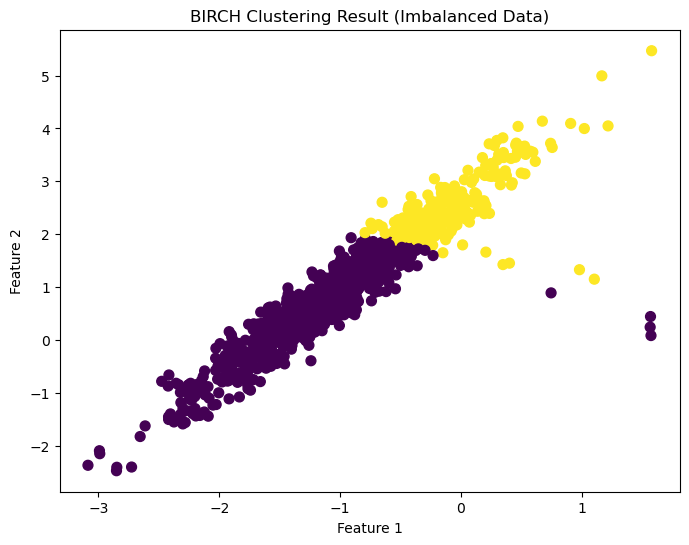

In [16]:
# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("BIRCH Clustering Result (Imbalanced Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [17]:
# Calculate the classification report for imbalanced data
print("Classification Report for Imbalanced Data:")
print(classification_report_imbalanced(y_imbalanced, clusters))


Classification Report for Imbalanced Data:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.76      0.60      0.86      0.67      0.46       990
          1       0.02      0.60      0.76      0.05      0.67      0.45        10

avg / total       0.98      0.76      0.60      0.85      0.67      0.46      1000

